# Matplotlib

In this appendix we will review some of the basics of plotting with Python's <a href="https://matplotlib.org/"> matplotlib</a>.
This is a library for creating static, animated, and interactive visualizations in Python. You can easilly install the
library by using ```pip```

```
pip install matplotlib
```

The main plot-generation module in ```matplotlib``` is ```pyplot``` that most of the 
times is imported using the alias ```plt```

In [1]:
import matplotlib.pyplot as plt

## Simple plots

Perhaps the simplest form of plotting is to show the relationship between two variables
$X$ and $Y$. We know that this can be done with a scatter plot; so we can use ```plt.scatter```.
Below we plot the function

\begin{equation}
y=3x+1 
\end{equation}

where $x \in [0,5]$

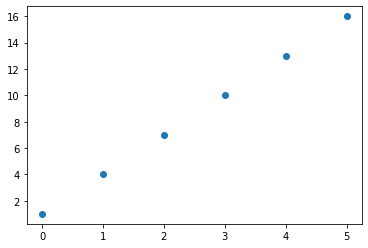

In [6]:
x = range(0,6)
y = [3*point + 1 for point in x]
plt.scatter(x,y)
plt.show()

if we prefer to plot a line, we can use the ```plt.plot``` function 

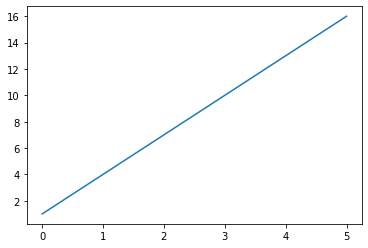

In [2]:
x = range(0,6)
y = [3*point + 1 for point in x]
plt.plot(x,y)
plt.show()

There are a few things we can do to optimize the plot; add title, label the axis
make the axis evenly spaced so that the slope of the line appears as it should be

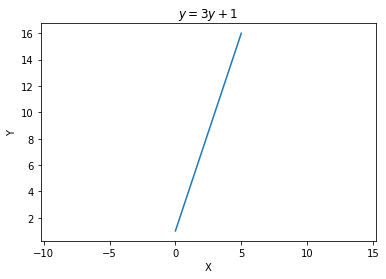

In [5]:
plt.plot(x,y)
# this will lead to an awkward visualization 
# with too much empty space
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('$y=3y+1$')
plt.show()

Let's assume we want to highlight some area under the plotted line, say when $x \in [1,4]$,
we can use the ```plt.fill_between```

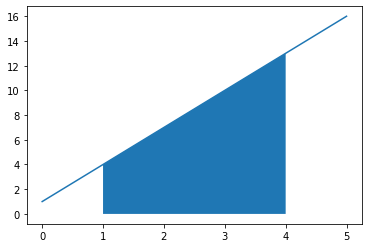

In [7]:
# helper function that returns True
# if x is in [minimum, maximum]
def is_in(x, minimum, maximum):
    return minimum <= x <= maximum

plt.plot(x,y)
shade=[is_in(value, 1, 4) for value in x]
plt.fill_between(x, y, where=shade)
plt.show()

one thing you should note is that ```matplotlib.pyplot``` will show in the
sample plot all the plots that have been created before execturing ```plt.plot()```.
This is illustrated below.

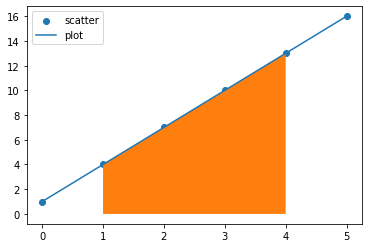

In [11]:
plt.scatter(x,y, label='scatter')
plt.plot(x,y, label='plot')
shade=[is_in(value, 1, 4) for value in x]
plt.fill_between(x, y, where=shade)
plt.legend(loc="upper left")
plt.show()

Let's try to apply the ```fill_between``` function on the normal distribution. 

In [9]:
import numpy as np
from scipy.stats import norm
import statistics

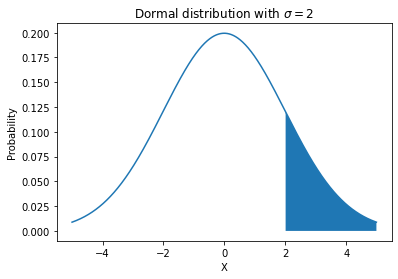

In [20]:
# Plot between -5 and 5 with .001 steps.
x_axis = np.arange(-5, 5, 0.01)

# Calculating mean 
mean = np.mean(x_axis)
sigma = 2
y_axis = norm.pdf(x_axis, mean, sigma)
plt.plot(x_axis, y_axis)
shade=[is_in(value, 2, 5) for value in x_axis]
plt.fill_between(x_axis, y_axis, where=shade)
plt.ylabel('Probability')
plt.xlabel('X')
plt.title(f'Dormal distribution with $\sigma={sigma}$') 
plt.show()

The shaded area represents the probability of observing $X\geq 2$. Note that the sum of the values on the $y-axis$ do not
necessarilly have to sum to one. Indeed

In [21]:
print(sum(y_axis))

98.75807606414821


Instead, it is the area under the curve that should be equal to 1.

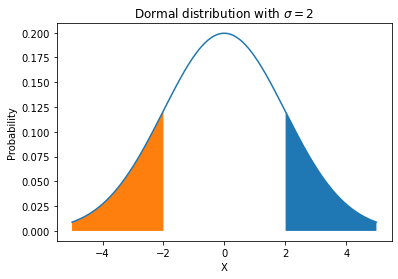

In [22]:
plt.plot(x_axis, y_axis)
shade_greater=[is_in(value, 2, 5) for value in x_axis]
shade_less=[is_in(value, -5, -2) for value in x_axis]
plt.fill_between(x_axis, y_axis, where=shade_greater)
plt.fill_between(x_axis, y_axis, where=shade_less)
plt.ylabel('Probability')
plt.xlabel('X')
plt.title(f'Dormal distribution with $\sigma={sigma}$') 
plt.show()

The shaded area represents the probability of observing $X\geq 2$ or $X\leq -2$ 